In [9]:
#!pip install flask_ngrok
#!pip install pyngrok==4.1.1
#!pip install pmdarima
#!ngrok authtoken 2abgolWHhhw33EGtWW84sQNiqe6_krJ6zoN8pWC2K2th9cLg #si llegara a expirar, crea un token nuevo en https://dashboard.ngrok.com/ en la sección Your Authtoken
#!pip install flask_cors

#Algunas funciones preliminares
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


def build_dataset(X,Y, hist_size):
  '''
  Params
    X: data matrix [n_time_steps, n_X_feats]
    Y: label matrix [n_time_steps, n_Y_feats]
    hist_size: integer indicating the number of time steps in each sample of x
  Returns
    x: tensor of input data [n_samples, n_timesteps, n_X_features]
    y: tensor of output data [n_samples, n_Y_features]
  '''
  n_samples = Y.shape[0] - hist_size
  x = np.zeros((n_samples, hist_size, X.shape[1]))
  y = np.zeros((n_samples))

  min_max_scaler = MinMaxScaler()
  X = min_max_scaler.fit_transform(X.values)

  for ind in range(n_samples):
    x[ind] = X[ind : ind + hist_size]
    y[ind] = Y[ind + hist_size]
  return x, y

def x_y_split(df,variable):
  ytrain=pd.DataFrame(df[variable])
  xtrain=df.drop([ytrain.columns.values],axis=1)
  return xtrain,ytrain

def correr_rnn(x_train,y_train,epocas=120,batches=6,nodo_in=32,nodos=[128,128,64],activac=['sigmoid','sigmoid','relu'],num_convol=12):
    x_train,y_train=build_dataset(x_train,y_train,num_convol)
    rnn_model = Sequential()
    rnn_model.add(Input(shape=(x_train.shape[1], x_train.shape[2])))
    rnn_model.add(SimpleRNN(units=nodo_in))
    for i in range(len(nodos)):
        rnn_model.add(Dense(nodos[i], activation=activac[i]))
    rnn_model.add(Dense(1, activation='linear'))
    rnn_model.compile(loss='mean_squared_error', optimizer='rmsprop')
    return rnn_model,rnn_model.fit(x_train, y_train, epochs=epocas, batch_size=batches, validation_split=0.1,verbose=0)

grids1={'epocas':[100],'batches':[4,8,16,24],
    'nodo_in':[32,64],'nodos':[[128,128,64],[64,64,64],[64,128,64],[64,128,128],[64,128],[128,64]],
        'activac':[['sigmoid','sigmoid','relu'],['sigmoid','sigmoid','relu'],['sigmoid','sigmoid','relu'],['sigmoid','sigmoid','relu'],['sigmoid','sigmoid'],['sigmoid','sigmoid']]}

grids_prueba={'epocas':[100],'batches':[4,8],
    'nodo_in':[32],'nodos':[[128,64]],
        'activac':[['sigmoid','relu']]}

def correr_red(data,variable,prelim0,func_red=correr_rnn,num_convol=12,grids=grids1):
    rnn_set=[]
    corridas_rnn_set=[]
    fit_inicial=[]
    rmse_rnn_train=[]
    rmse_rnn_test=[]
    x_set,y_set=x_y_split(data,variable)
    x_fit,y_fit=x_y_split(prelim0,variable)
    x_fit,y_fit=build_dataset(x_fit,y_fit,num_convol)
    count=0
    for i in range(len(grids['nodo_in'])):
        for j in range(len(grids['nodos'])):
            for k in range(len(grids['epocas'])):
                for l in range(len(grids['batches'])):
                    red,cor=func_red(x_set,y_set,grids['epocas'][k],grids['batches'][l],grids['nodo_in'][i],grids['nodos'][j],grids['activac'][j],num_convol)
                    rnn_set.append(red)
                    fit_inicial.append(pd.DataFrame(red.predict(x_fit)).set_index(prelim0.index[num_convol:]))
                    corridas_rnn_set.append(cor)
                    print('termina modelo '+str(count)+' de '+str(variable)+' de '+str(func_red))
                    count=count+1
                    rmse_rnn_train.append([cor.history['loss'][-1]])
                    rmse_rnn_test.append([cor.history['val_loss'][-1]])
    return [rnn_set,corridas_rnn_set,fit_inicial,rmse_rnn_train,rmse_rnn_test]

def modelo_menor_rmse(red):
    convol=12
    red=pd.DataFrame({})
    for i in range(len(red[2])):
        red=pd.concat([red,pd.DataFrame(red[2][i])],axis=1)
    red=red.set_axis([list(range(len(red[2])))],axis=1)
    from sklearn.metrics import mean_squared_error
    rmses=pd.DataFrame({})
    for i in range(len(red[2])):
        rmses=pd.concat([rmses,pd.DataFrame([mean_squared_error(red[i][:T0-convol],train_set.iloc[:,obj1][convol:],squared=False),
            mean_squared_error(red[i][T0-convol:T1+T0-convol],test_set.iloc[:,obj1],squared=False)],index=['RMSE train','RMSE test'])],axis=1)
    rmses=rmses.set_axis([list(range(len(red[2])))],axis=1)
    mayor=np.argmin(rmses.iloc[1,:])

    return red[mayor]

In [1]:
"""from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, SimpleRNN, Dense
from tensorflow.keras.utils import plot_model
"""

: 

: 

# Para descargar el archivo de predicciones

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
Exception in thread Thread-37:
Traceback (most recent call last):
  File "/Users/1thaliaespana1/opt/anaconda3/envs/itam/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/1thaliaespana1/opt/anaconda3/envs/itam/lib/python3.11/threading.py", line 1394, in run
    self.function(*self.args, **self.kwargs)
  File "/Users/1thaliaespana1/opt/anaconda3/envs/itam/lib/python3.11/site-packages/flask_ngrok.py", line 70, in start_ngrok
    ngrok_address = _run_ngrok()
                    ^^^^^^^^^^^^
  File "/Users/1thaliaespana1/opt/anaconda3/envs/itam/lib/python3.11/site-packages/flask_ngrok.py", line 29, in _run_ngrok
    os.chmod(executable, 777)
FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/4z/3y0y0k_506x0t2452xb26_tr0000gn/T/ngrok/ngrok'
127.0.0.1 - - [05/Feb/2024 18:50:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Feb/2024 18:50:40] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0

se cargaron insumos 2024-02-05 18:51:08.158168
empieza arima sin x 2024-02-05 18:51:08.160902
se corrió arima sin x 2024-02-05 18:52:06.668536
empieza arima con x 2024-02-05 18:52:06.668799


127.0.0.1 - - [05/Feb/2024 18:52:29] "POST /data HTTP/1.1" 200 -


se corrió arima con x 2024-02-05 18:52:29.553969
se creó el zip


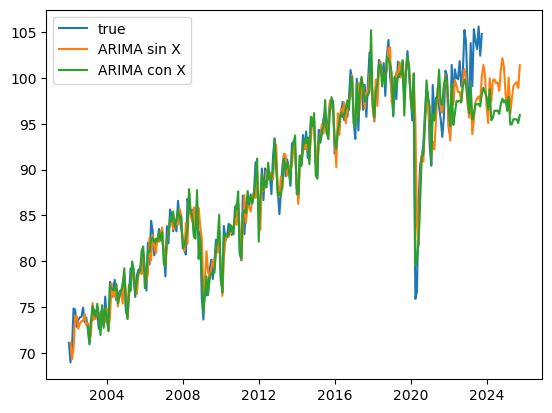

In [10]:
# CÓDIGO PARA DESCARGAR ARCHIVO

import os
from flask import Flask, flash, request, redirect, url_for, Response,send_file
from flask_ngrok import run_with_ngrok
from werkzeug.utils import secure_filename
from sklearn.model_selection import train_test_split
from datetime import datetime
from zipfile import ZipFile

UPLOAD_FOLDER = '.'
ALLOWED_EXTENSIONS = {'csv'}

html1='''
    <!doctype html>
    <title>Pronósticos de series de tiempo</title>
    <h1>Página para pronosticar series de tiempo mediante ARIMA sin regresores (ETA 1 min), ARIMA con regresores (ETA 2 min) y RNN (ETA 12 min)</h1>
    <p>Esta página ejecuta modelos simples autorregresivos de media móvil y de redes neuronales para series de tiempo.
        Para hacer uso de ella, insertar la matriz de la variable objetivo y de los regresores con fecha en formato d/m/a,
        así como el número de periodos que se quiere pronosticar hacia adelante.
        </p>
<body>
    <p>Paso 1) Inserta tu matriz de variables en formato csv (no debe tener columnas o filas en blanco):</p>
    <!-- <form method=post enctype=multipart/form-data>
      <input type="file" name="file">
    </form> -->
    <input id="file" type="file">
    <p> Paso 2) ¿Cuál es la variable objetivo? Inserta el número de columna (empieza en uno):</p>
    <p>Columna objetivo: <input id="columna" type = "number" value = 1 /></p>
    <p>Número de periodos a pronosticar: <input id="periodos" type = "number" value = 24 /></p>
    <button id="init">Iniciar</button>
    <img id="grafica1" src="">
    <script>
        const column=document.getElementById("columna")
        const n_per=document.getElementById("periodos")
        const data=document.getElementById("file")
        let archivo;
        let form;
        data.onchange=()=>{
            archivo=data.files[0]
            console.log(archivo)
        }
        document.getElementById("init").addEventListener("click", ()=>{
            form=new FormData();
            form.append("obj",column.value)
            form.append("periodos",n_per.value)
            form.append("file",archivo)
            form.append("init","Iniciar pronóstico")
            fetch("http://127.0.0.1:5000/data",{
                method:"POST",
                body:form
            }).then((r)=> r.blob()).then((blob)=>{
                var file=window.URL.createObjectURL(blob);
                console.log(file)
                var element=document.createElement("a");
                element.setAttribute("href",file);
                element.style.display="none";
                document.body.appendChild(element);
                element.click();
                document.body.removeChild(element);
                alert("Tus predicciones se descargaron exitosamente")

            }).catch((c)=>{
                console.log(c)
            })
        },false)
    </script>
    </body>
    '''
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from flask_cors import CORS
import pandas as pd
import numpy as np
import pmdarima

app = Flask(__name__)
CORS(app)
run_with_ngrok(app)
@app.route('/', methods=['GET', 'POST'])
def pag_inicio():
    return html1


@app.route('/data', methods=['POST','GET'])
def prediction():
    if request.method == 'POST':
        if request.form.get('init')=="Iniciar pronóstico":
            num_periodos=int(request.form['periodos'])
            data=request.files['file']
            data.save(data.filename)
            data=pd.read_csv(data.filename)
            data=pd.DataFrame(data).set_index([pd.date_range(data.iloc[0,0],periods=data.shape[0],freq='MS')]).drop(['Unnamed: 0'],axis=1)
            obj1=int(request.form['obj'])-1
            n_per=int(request.form['periodos'])
            print('se cargaron insumos',datetime.now())
            train_set, test_set = train_test_split(data, train_size=0.9, test_size=0.1, shuffle=False)
            yest=train_set.iloc[:,obj1]
            xest=train_set.drop(train_set.columns.values[obj1],axis=1)
            T0=train_set.shape[0]
            T1=test_set.shape[0]
            K0=train_set.shape[1]
            K1=test_set.shape[1]
            convol=12
            #ARIMA sin X
            print('empieza arima sin x',datetime.now())
            prelim=train_set.apply(lambda x:pmdarima.arima.auto_arima(x,error_action='ignore',suppress_warnings=True, maxiter=10,with_intercept=True,seasonal=True, m=12))
            prelim1=np.transpose(prelim.apply(lambda x:x.predict(T1+num_periodos)))
            prelim1=pd.DataFrame(pd.concat([prelim.apply(lambda x:x.predict_in_sample()).transpose()[1:],prelim1],axis=0))
            print('se corrió arima sin x',datetime.now())
            #ARIMA con X
            print('empieza arima con x',datetime.now())
            auto_arimas_conexp=pmdarima.arima.auto_arima(yest,xest,error_action='ignore',suppress_warnings=True, maxiter=10,with_intercept=True,seasonal=True, m=12)
            regresores=pd.DataFrame(prelim1[-num_periodos-T1:]).drop([data.columns[obj1]],axis=1)
            preds=auto_arimas_conexp.predict(T1+num_periodos,regresores)
            in_set1=auto_arimas_conexp.predict_in_sample(xest)[12:]
            prelim2=pd.concat([in_set1,preds],axis=0)
            print('se corrió arima con x',datetime.now())
            #RNN
            #print('se empezó red',datetime.now())
            #modelo_rnn=correr_red(data,obj1,prelim1,correr_rnn,12,grids=grids_prueba)
            #modelo_rnn=modelo_menor_rmse(modelo_rnn)
            #print('se terminó red',datetime.now())
            preds_1=pd.concat([prelim1.iloc[:,obj1],prelim2],axis=1).set_axis(['ARIMA sin X','ARIMA con X'],axis=1)
            preds_1.iloc[-num_periodos:,:].to_csv('predicciones_modelos.csv')
            plt.plot(data.index,data.iloc[:,obj1],prelim1.index,prelim1.iloc[:,obj1],prelim2.index,prelim2)#,modelo_rnn.index,modelo_rnn)
            plt.legend(['true','ARIMA sin X','ARIMA con X'])
            plt.savefig('graficas_modelos.png')
            with ZipFile('modelos_timeseries.zip', 'w') as zip_object:
                 zip_object.write('graficas_modelos.png')
                 zip_object.write('predicciones_modelos.csv')
            print('se creó el zip')
            return send_file('modelos_timeseries.zip')
        else: return html1
    else: return html1

app.run()

#seleccionar el link que diga algo parecido a esto hasta abajo: * Running on 449d-34-73-203-22.ngrok-free.app